In [1]:
import re
import sqlite3
from collections import namedtuple
from datetime import date

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

In [2]:
Price = namedtuple('Price', ['date', 'hemisphere', 'time_of_day', 'price'])

In [3]:
metadata_regexp = r'(?P<date>\d{4}-\d{2}-\d{2}) (?P<hemisphere>NH|SH) (?P<time_of_day>am|pm|purchase)'

In [4]:
with open("turnip_prices.txt", "r", encoding="utf-8") as file:
    prices = []
    for line in file:
        meta_data, price = line.split("\t")
        
        match = re.match(metadata_regexp, meta_data)
        if match:
            _date, _hemisphere, _time_of_day = match.groupdict().values()
            prices.append(Price(date=date.fromisoformat(_date), hemisphere=_hemisphere, time_of_day=_time_of_day, price=int(price)))

In [5]:
df = pd.DataFrame.from_records(prices, columns=['date', 'hemisphere', 'time_of_day', 'price'])

In [6]:
connection = sqlite3.connect('stonks.db')
with connection:
    df.to_sql('prices', con=connection, if_exists='replace')

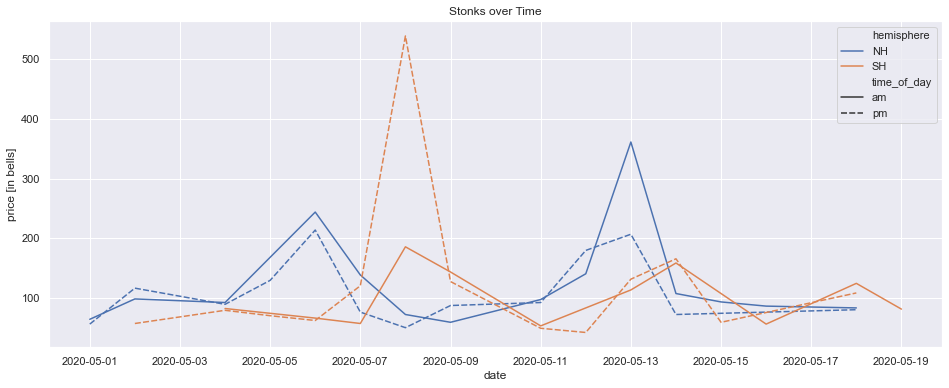

In [7]:
plt.figure(figsize=(16,6))
chart = sns.lineplot(
    x='date', 
    y='price',
    hue='hemisphere',
    style='time_of_day', 
    data=df[df['time_of_day'] != 'purchase']
)
chart.set_title("Stonks over Time")
chart.set_ylabel("price [in bells]")
chart.get_figure().savefig('stonks_over_time.png')

In [8]:
df[df['time_of_day'] != 'purchase'].groupby(by='hemisphere').median()

,price
hemisphere,
NH,93
SH,82


In [9]:
df[df['time_of_day'] != 'purchase'].groupby(by='hemisphere').mean()

,price
hemisphere,
NH,118.666667
SH,112.920000
